In [1]:
import matplotlib
matplotlib.use('Agg')
import pandas as pd
import seaborn as sns
import glob
import numpy as np
# Some preprocessing utilities
from sklearn.cross_validation import train_test_split # Data splitting
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
# Model result function
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn.utils import shuffle
import itertools
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
sns.set_context('paper',font_scale=2.5)
palette = sns.plt.cm.gray_r
#sns.set_style("ticks", {"xtick.major.size": 10, "ytick.major.size": 10})

# set masked values to plot red
palette.set_bad('r', 1.0)
%matplotlib inline

/data/olorato/mywork/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data_files = glob.glob("HH13333*pks16*0and1*csv")+ glob.glob("HH13*pks16*0and2*csv")
print data_files

['HH1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv', 'HH1324619115_pks1613-586.1826.ms_all_data_baseline0and2.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and2.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and2.csv']


In [6]:
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']

In [23]:
#data[name] #= 
#normalize(np.reshape(data[name],(1,-1)),norm='l2')[0]

In [25]:
datasets = []
files = []
for filename in data_files[:7]:#[:15]:
    data = pd.DataFrame.from_csv(filename)
    if len(np.where(data["rfi"].values == 1)[0])/float(len(data["rfi"])) < 0.4:
        for name in names:
            data[name] = normalize(np.reshape(data[name],(1,-1)),norm='l2')[0]
        datasets.append(data)
        files.append(filename)
    del data
HH_X0 = pd.concat(datasets, ignore_index=True)

datasets = []
for filename in files:
    data = pd.DataFrame.from_csv(filename.replace('HH','VV'))
    for name in names:
            data[name] = normalize(np.reshape(data[name],(1,-1)),norm='l2')[0]
    datasets.append(data)
    del data
VV_X0 = pd.concat(datasets, ignore_index=True)
del datasets

datasets = []
for filename in files:
    data = pd.DataFrame.from_csv(filename.replace('HH','HV'))
    for name in names:
            data[name] = normalize(np.reshape(data[name],(1,-1)),norm='l2')[0]
    datasets.append(data)
    del data
HV_X0 = pd.concat(datasets, ignore_index=True)
del datasets

In [26]:
print files

['HH1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv', 'HH1324619115_pks1613-586.1826.ms_all_data_baseline0and2.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and2.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and2.csv']


In [27]:
for i in range(10):
    HH_X0 = shuffle(HH_X0)
    VV_X0 = shuffle(VV_X0)
    HV_X0 = shuffle(HV_X0)

HH_X0_not = HH_X0[HH_X0["rfi"]==0]
HH_X0_is = HH_X0[HH_X0["rfi"]==1]
HH_X0 = pd.concat([HH_X0_not[:len(HH_X0_is)*3],HH_X0_is], ignore_index=True)
del HH_X0_not
del HH_X0_is

VV_X0_not = VV_X0[VV_X0["rfi"]==0]
VV_X0_is = VV_X0[VV_X0["rfi"]==1]
VV_X0 = pd.concat([VV_X0_not[:len(VV_X0_is)*3],VV_X0_is], ignore_index=True)
del VV_X0_not
del VV_X0_is

HV_X0_not = HV_X0[HV_X0["rfi"]==0]
HV_X0_is = HV_X0[HV_X0["rfi"]==1]
HV_X0 = pd.concat([HV_X0_not[:len(HV_X0_is)*3],HV_X0_is], ignore_index=True)
del HV_X0_not
del HV_X0_is

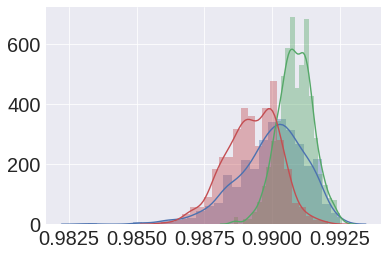

In [28]:
model_accuracies = []

for i in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(HH_X0[names], HH_X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

model_accuracies = []

for i in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(HV_X0[names], HV_X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

model_accuracies = []

for i in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(VV_X0[names], VV_X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sns.distplot(model_accuracies)

sns.plt.show()

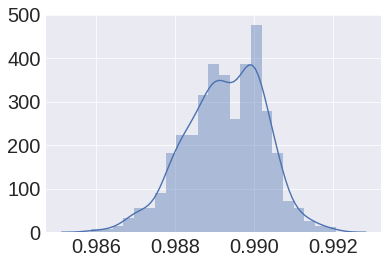

In [29]:
sns.distplot(model_accuracies)

sns.plt.show()

In [30]:
for i in range(10):
    HH_X0= shuffle(HH_X0)
    HV_X0= shuffle(HV_X0)
    VV_X0= shuffle(VV_X0)
x_train0HH, x_test0HH, y_train0HH, y_test0HH = train_test_split(HH_X0[names], HH_X0['rfi'], test_size=0.30,random_state=0)

x_train0HV, x_test0HV, y_train0HV, y_test0HV = train_test_split(HV_X0[names], HV_X0['rfi'], test_size=0.30,random_state=0)

x_train0VV, x_test0VV, y_train0VV, y_test0VV = train_test_split(VV_X0[names], VV_X0['rfi'], test_size=0.30,random_state=0)




In [31]:
#x_train0HH['rfi'] = y_train0HH
#print x_train0HH.columns

In [32]:
HHcv = StratifiedKFold(y_train0HH, n_folds=10,shuffle=True, random_state=0)
VVcv = StratifiedKFold(y_train0VV, n_folds=10,shuffle=True, random_state=0)
HVcv = StratifiedKFold(y_train0HV, n_folds=10,shuffle=True, random_state=0)
rfc = RandomForestClassifier(random_state=0)
grid = {'n_estimators': np.arange(1, 11)
        ,'criterion': ['gini', 'entropy']
        ,'max_features':['sqrt','log2']
        ,'max_depth':np.arange(2,11)
        ,"min_samples_split": np.arange(2, 11)
        ,"min_samples_leaf": np.arange(2, 11)
        ,"bootstrap": [True, False]
        ,'min_samples_split':np.arange(2,11)}

HHrfc = RandomizedSearchCV(rfc, grid, cv=HHcv,n_iter=10)

VVrfc = RandomizedSearchCV(rfc, grid, cv=VVcv,n_iter=10)

HVrfc = RandomizedSearchCV(rfc, grid, cv=HVcv,n_iter=10)



In [33]:
HHrfc.fit(x_train0HH,y_train0HH)
HHy_pred_prob_rfc = HHrfc.predict_proba(x_test0HH)
HHy_pred_rfc = HHrfc.predict(x_test0HH)

VVrfc.fit(x_train0VV,y_train0VV)
VVy_pred_prob_rfc = VVrfc.predict_proba(x_test0VV)
VVy_pred_rfc = VVrfc.predict(x_test0VV)

HVrfc.fit(x_train0HV,y_train0HV)
HVy_pred_prob_rfc = HVrfc.predict_proba(x_test0HV)
HVy_pred_rfc = HVrfc.predict(x_test0HV)

In [34]:
#testVV = pd.DataFrame.from_csv('VV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
##y_pred_prob_rfc_VV = rfc.predict_proba(testVV[names])
#y_pred_rfc_VV = rfc.predict(testVV[names])
#del testVV
#testHV = pd.DataFrame.from_csv('HV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
#y_pred_prob_rfc_HV = rfc.predict_proba(testHV[names])
#y_pred_rfc_HV = rfc.predict(testHV[names])
#del testHV

In [35]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [36]:
report(HHrfc.cv_results_)
report(VVrfc.cv_results_)
report(HVrfc.cv_results_)

Model with rank: 1
Mean validation score: 0.924 (std: 0.008)
Parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 8, 'max_features': 'log2', 'criterion': 'gini', 'min_samples_split': 4, 'max_depth': 10}

Model with rank: 2
Mean validation score: 0.919 (std: 0.007)
Parameters: {'bootstrap': True, 'min_samples_leaf': 10, 'n_estimators': 9, 'max_features': 'log2', 'criterion': 'entropy', 'min_samples_split': 3, 'max_depth': 8}

Model with rank: 3
Mean validation score: 0.919 (std: 0.010)
Parameters: {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 3, 'max_features': 'log2', 'criterion': 'gini', 'min_samples_split': 6, 'max_depth': 7}

Model with rank: 1
Mean validation score: 0.965 (std: 0.018)
Parameters: {'bootstrap': False, 'min_samples_leaf': 8, 'n_estimators': 10, 'max_features': 'sqrt', 'criterion': 'gini', 'min_samples_split': 2, 'max_depth': 9}

Model with rank: 2
Mean validation score: 0.933 (std: 0.031)
Parameters: {'bootstrap': True, 'min_samples_le

In [37]:
print HHrfc.best_estimator_

print VVrfc.best_estimator_

print HVrfc.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=9, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
      

In [38]:
def roc_plot(classifiers,subplot,model_names):
    #c = ['r','g','b']
    if subplot == True:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            sns.plt.subplot(1,num,i+1)
            clf = classifiers[i]
            y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            #sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    if subplot == False:
        num = len(classifiers)
        sns.plt.figure(figsize=(10,10))
        for i in range(num):
            clf = classifiers[i]
            if 'VV' in model_names[i]:
                y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0VV, clf[:,1])
            elif 'HV' in model_names[i]:
                y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0HV, clf[:,1])
            else:
                y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0HH, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            #sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    return

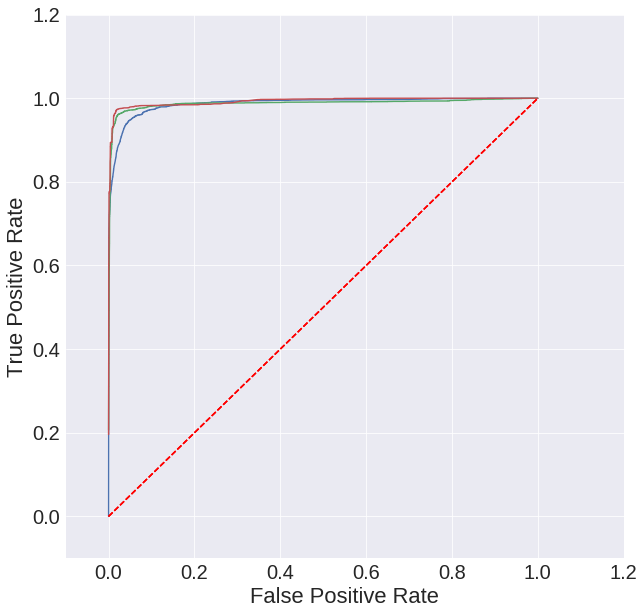

In [39]:
model_names =['HH','VV','HV']
roc_plot([HHy_pred_prob_rfc ,VVy_pred_prob_rfc,HVy_pred_prob_rfc],False,model_names)
sns.plt.show()
sns.plt.savefig("polroc.png")

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=sns.plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.plt.imshow(cm, interpolation='nearest', cmap=cmap)
    sns.plt.title(title)
    sns.plt.colorbar()
    tick_marks = np.arange(len(classes))
    sns.plt.xticks(tick_marks, classes, rotation=45)
    sns.plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        sns.plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    sns.plt.tight_layout()
    sns.plt.grid(False)
    sns.plt.ylabel('True label')
    sns.plt.xlabel('Predicted label')
    
def evaluate(model,modelname):
    for i in range(len(models)):
        # Do the actual prediction
        print('====================================================')
        print('Classification Report for %s'%modelname[i])
        print('====================================================')
        if 'VV' in model_names[i]:
            print(classification_report(y_test0VV,model[i],target_names=['Not RFI','RFI']))

            print('\n The model is %f accurate' %(accuracy_score(y_test0VV,model[i])*100))
            print('Confusion Matrix')
            cnf_matrix = confusion_matrix(y_test0VV,model[i])
            sns.plt.figure()
        #sns.plt.subplot(1,3,i+1)
            plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix')
            #sns.plt.subplot(2,1,2)
            #plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True
        #                      ,title='Normalized confusion matrix')
            print('====================================================\n\n')
            
        elif 'HV' in model_names[i]:
            print(classification_report(y_test0HV,model[i],target_names=['Not RFI','RFI']))

            print('\n The model is %f accurate' %(accuracy_score(y_test0HV,model[i])*100))
            print('Confusion Matrix')
            cnf_matrix = confusion_matrix(y_test0HV,model[i])
            sns.plt.figure()
        #sns.plt.subplot(1,3,i+1)
            plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix')
            #sns.plt.subplot(2,1,2)
            #plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True
        #                      ,title='Normalized confusion matrix')
            print('====================================================\n\n')            
        else:
            print(classification_report(y_test0HH,model[i],target_names=['Not RFI','RFI']))

            print('\n The model is %f accurate' %(accuracy_score(y_test0HH,model[i])*100))
            print('Confusion Matrix')
            cnf_matrix = confusion_matrix(y_test0HH,model[i])
            sns.plt.figure()
        #sns.plt.subplot(1,3,i+1)
            plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix')
            #sns.plt.subplot(2,1,2)
            #plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True
        #                      ,title='Normalized confusion matrix')
            print('====================================================\n\n')

Classification Report for HH polarization
             precision    recall  f1-score   support

    Not RFI       0.93      0.97      0.95      6205
        RFI       0.97      0.93      0.95      6407

avg / total       0.95      0.95      0.95     12612


 The model is 95.091976 accurate
Confusion Matrix


Classification Report for VV polarization
             precision    recall  f1-score   support

    Not RFI       0.97      0.98      0.97      6259
        RFI       0.98      0.97      0.97      6353

avg / total       0.97      0.97      0.97     12612


 The model is 97.224865 accurate
Confusion Matrix


Classification Report for HV polarization
             precision    recall  f1-score   support

    Not RFI       0.98      0.99      0.98      6297
        RFI       0.99      0.97      0.98      6315

avg / total       0.98      0.98      0.98     12612


 The model is 98.097050 accurate
Confusion Matrix




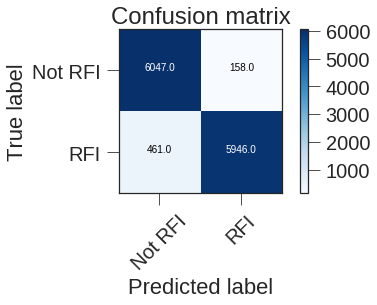

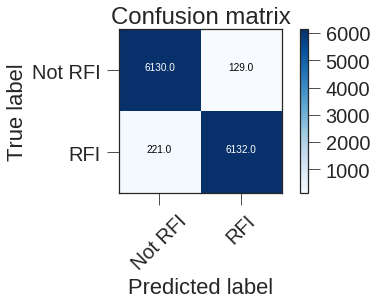

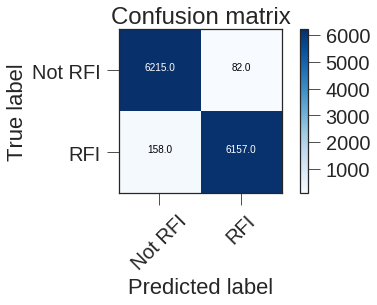

In [124]:
models =[HHy_pred_rfc, VVy_pred_rfc,HVy_pred_rfc]
model_names =['HH polarization','VV polarization','HV polarization']
#sns.plt.figure(figsize=(20,20))
evaluate(models,model_names)
sns.plt.show()

In [125]:
#testVV = pd.DataFrame.from_csv('VV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
print "HH"
y_pred_rfc = HHrfc.predict(HH_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HH_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = HHrfc.predict(VV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(VV_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = HHrfc.predict(HV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HV_X0['rfi'],y_pred_rfc)*100))


print "VV"
y_pred_rfc = VVrfc.predict(HH_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HH_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = VVrfc.predict(VV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(VV_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = VVrfc.predict(HV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HV_X0['rfi'],y_pred_rfc)*100))

print "HV"
y_pred_rfc = HVrfc.predict(HH_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HH_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = HVrfc.predict(VV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(VV_X0['rfi'],y_pred_rfc)*100))

y_pred_rfc = HVrfc.predict(HV_X0[names])
print('\n The model is %f accurate' %(accuracy_score(HV_X0['rfi'],y_pred_rfc)*100))




HH

 The model is 95.680099 accurate

 The model is 66.780056 accurate

 The model is 78.778724 accurate
VV

 The model is 64.717636 accurate

 The model is 97.671155 accurate

 The model is 80.641325 accurate
HV

 The model is 63.885056 accurate

 The model is 70.564727 accurate

 The model is 98.322946 accurate


In [126]:
unseen = 'HH1324619115_pks1934-63.1826.ms_all_data_baseline0and2.csv'
HHunseen = pd.DataFrame.from_csv(unseen)
VVunseen = pd.DataFrame.from_csv(unseen.replace("HH","VV"))
HVunseen = pd.DataFrame.from_csv(unseen.replace("HH","HV"))
print " HH unseen"
y_pred_rfc = HHrfc.predict(normalize(HHunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HHunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = HHrfc.predict(normalize(VVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(VVunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = HHrfc.predict(normalize(HVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HVunseen['rfi'],y_pred_rfc)*100))

print " VV unseen"
y_pred_rfc = VVrfc.predict(normalize(HHunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HHunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = VVrfc.predict(normalize(VVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(VVunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = VVrfc.predict(normalize(HVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HVunseen['rfi'],y_pred_rfc)*100))

print " HV unseen"
y_pred_rfc = HVrfc.predict(normalize(HHunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HHunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = HVrfc.predict(normalize(VVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(VVunseen['rfi'],y_pred_rfc)*100))

y_pred_rfc = HVrfc.predict(normalize(HVunseen[names],norm='l2',axis=0))
print('\n The model is %f accurate' %(accuracy_score(HVunseen['rfi'],y_pred_rfc)*100))

 HH unseen

 The model is 97.671716 accurate

 The model is 95.082167 accurate

 The model is 96.853028 accurate
 VV unseen

 The model is 72.868247 accurate

 The model is 85.666028 accurate

 The model is 82.965177 accurate
 HV unseen

 The model is 98.746997 accurate

 The model is 82.071509 accurate

 The model is 86.189724 accurate


In [127]:
importances = HHrfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in HHrfc.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train0HH.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    feature_space.append(names[indices[f]])

Feature ranking:
1. feature tC_mean (0.662301)
2. feature tp_mean (0.059854)
3. feature t_cumsumx (0.050358)
4. feature t_per25 (0.035774)
5. feature t_sumvalues (0.032318)
6. feature f_sumvalues (0.025545)
7. feature t_var (0.025082)
8. feature t_per75 (0.021129)
9. feature f_per75 (0.019664)
10. feature fp_mean (0.019055)
11. feature fC_mean (0.010897)
12. feature f_slope (0.006187)
13. feature f_per25 (0.005448)
14. feature d_p (0.005145)
15. feature f_var (0.004540)
16. feature f_kurtosis (0.004154)
17. feature t_skew (0.003610)
18. feature t_slope (0.002896)
19. feature f_cumsumx (0.002714)
20. feature f_skew (0.001865)
21. feature t_kurtosis (0.001463)


In [128]:
importances = VVrfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in VVrfc.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train0HH.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    feature_space.append(names[indices[f]])

Feature ranking:
1. feature tC_mean (0.674655)
2. feature tp_mean (0.076420)
3. feature t_cumsumx (0.058493)
4. feature t_sumvalues (0.042220)
5. feature t_per25 (0.029221)
6. feature t_var (0.025335)
7. feature fp_mean (0.024427)
8. feature t_per75 (0.022161)
9. feature fC_mean (0.011874)
10. feature f_sumvalues (0.008271)
11. feature d_p (0.004253)
12. feature f_cumsumx (0.003969)
13. feature f_skew (0.003705)
14. feature t_skew (0.002957)
15. feature f_per75 (0.002427)
16. feature f_slope (0.002266)
17. feature f_kurtosis (0.001766)
18. feature t_slope (0.001730)
19. feature t_kurtosis (0.001627)
20. feature f_var (0.001294)
21. feature f_per25 (0.000927)


In [129]:
importances = HVrfc.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in HVrfc.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train0HH.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
    feature_space.append(names[indices[f]])

Feature ranking:
1. feature tC_mean (0.619514)
2. feature tp_mean (0.066220)
3. feature t_cumsumx (0.065455)
4. feature t_sumvalues (0.052379)
5. feature t_per75 (0.044388)
6. feature f_per75 (0.025048)
7. feature f_cumsumx (0.022463)
8. feature fC_mean (0.020247)
9. feature t_per25 (0.019106)
10. feature t_var (0.018429)
11. feature fp_mean (0.012133)
12. feature f_var (0.011019)
13. feature f_sumvalues (0.008704)
14. feature f_kurtosis (0.003944)
15. feature f_slope (0.003065)
16. feature d_p (0.002737)
17. feature f_skew (0.001391)
18. feature t_kurtosis (0.001119)
19. feature f_per25 (0.001028)
20. feature t_skew (0.000944)
21. feature t_slope (0.000669)
